In [2]:
import os
import cv2
import random
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import os
import shutil
from random import shuffle

def split_data(source_folder, train_folder, valid_folder, test_folder, train_ratio=0.7, valid_ratio=0.15):
    
    if not os.path.isdir(source_folder):
        print(f"Source folder {source_folder} does not exist.")
        return
    
    for category in os.listdir(source_folder):
        cat_dir = os.path.join(source_folder, category)
        if not os.path.isdir(cat_dir):
            continue  
        
        images = os.listdir(cat_dir)
        shuffle(images) 

        
        train_split = int(len(images) * train_ratio)
        valid_split = train_split + int(len(images) * valid_ratio)
        
        
        train_imgs = images[:train_split]
        valid_imgs = images[train_split:valid_split]
        test_imgs = images[valid_split:]
        
        
        def move_imgs(img_list, destination):
            dest_path = os.path.join(destination, category)
            os.makedirs(dest_path, exist_ok=True) 
            for img in img_list:
                src_path = os.path.join(cat_dir, img)
                shutil.move(src_path, os.path.join(dest_path, img))
        
        
        move_imgs(train_imgs, train_folder)
        move_imgs(valid_imgs, valid_folder)
        move_imgs(test_imgs, test_folder)
        
        print(f"Processed {category}: Train: {len(train_imgs)}, Valid: {len(valid_imgs)}, Test: {len(test_imgs)}")


source_dir = "C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata/ALLDATA"
train_dir = "C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata/train"
valid_dir = "C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata/valid"
test_dir = "C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata/test"


split_data(source_dir, train_dir, valid_dir, test_dir)


Processed ABDULLAH AL SHAHRIAR: Train: 0, Valid: 0, Test: 0
Processed AHMED IMTIAZ: Train: 0, Valid: 0, Test: 0
Processed AL-NAFI: Train: 0, Valid: 0, Test: 0
Processed ARNAB BISHAKH SARKER: Train: 0, Valid: 0, Test: 0
Processed ASHA ISLAM: Train: 0, Valid: 0, Test: 0
Processed ASHIK AHAMED: Train: 0, Valid: 0, Test: 0
Processed BISHANATH TARAFDER: Train: 0, Valid: 0, Test: 0
Processed BORSHON ALFRED GOMES: Train: 0, Valid: 0, Test: 0
Processed ELMA ISLAM: Train: 0, Valid: 0, Test: 0
Processed ESM-E MOULA CHOWDHURY ABHA: Train: 0, Valid: 0, Test: 0
Processed FAHIM RAHMAN: Train: 0, Valid: 0, Test: 0
Processed FAIZA BINTE ZAMAN: Train: 0, Valid: 0, Test: 0
Processed IMAM HASAN JAMI: Train: 0, Valid: 0, Test: 0
Processed KHANDAKER AZNAN ALAM SEAM: Train: 0, Valid: 0, Test: 0
Processed MAHASHETAB HASSAN: Train: 0, Valid: 0, Test: 0
Processed MAHBUBUL ISLAM ABDULLAH: Train: 0, Valid: 0, Test: 0
Processed MAHFUZUR RAHMAN FERDOUS: Train: 0, Valid: 0, Test: 0
Processed MAHNAZ HOSSAIN: Train: 

In [4]:
DATA_DIR = 'C:/Users/Borshon Alfred Gomes/Desktop/CVPR Project/DATASETS/Imagedata'
TRAIN_DATA_DIR = os.path.join(DATA_DIR, 'train')
VALID_DATA_DIR = os.path.join(DATA_DIR, 'valid')
TEST_DATA_DIR = os.path.join(DATA_DIR, 'test')

In [5]:
IMG_SIZE = 300
CATEGORIES = []

for i in os.listdir(TRAIN_DATA_DIR):
    CATEGORIES.append(i)
    
print(CATEGORIES)

['ABDULLAH AL SHAHRIAR', 'AHMED IMTIAZ', 'AL-NAFI', 'ARNAB BISHAKH SARKER', 'ASHA ISLAM', 'ASHIK AHAMED', 'BISHANATH TARAFDER', 'BORSHON ALFRED GOMES', 'ELMA ISLAM', 'ESM-E MOULA CHOWDHURY ABHA', 'FAHIM RAHMAN', 'FAIZA BINTE ZAMAN', 'IMAM HASAN JAMI', 'KHANDAKER AZNAN ALAM SEAM', 'MAHASHETAB HASSAN', 'MAHBUBUL ISLAM ABDULLAH', 'MAHFUZUR RAHMAN FERDOUS', 'MAHNAZ HOSSAIN', 'MD ABID HASAN RAPPY', 'MD ABU ZAYED KHAN', 'MD ANAS KHAN', 'MD ASRAFUL KABIR SOHAN', 'MD ATIK ULLAH KHAN', 'MD FARDIN AMIN RIYAD', 'MD IMTIAJ ALAM SAJIN', 'MD JAHID HASSAN', 'MD MUNTASIR AREFIN NAEEM', 'MD MUSFIQUR RAHMAN', 'MD NAFIZ AHMED', 'MD NAIMUR RAHMAN', 'MD NAKIB MUNSIF', 'MD NAZMUL HASSAN BHUIYAN', 'MD RIFAT SHIKDAR', 'MD SAIFUR RAHMAN SADI', 'MD SAJID ISLAM KHAN', 'MD SHANZID HASAN', 'MD TANZIB HOSAIN', 'MD TAREK MAHMUD', 'MD TOYABUR RAHAMAN', 'MD WAHIDUZZAMAN SUVA', 'MOHAMMAD BIN AB JALIL SHEAKH', 'MOHAMMAD NUR', 'MOHAMMAD RAFIUL HAQUE', 'MOHAMMED TANVIR HASSAN', 'MOHIBUL ALAM ANANDA', 'MOMOTAZ YEASMIN', 'M

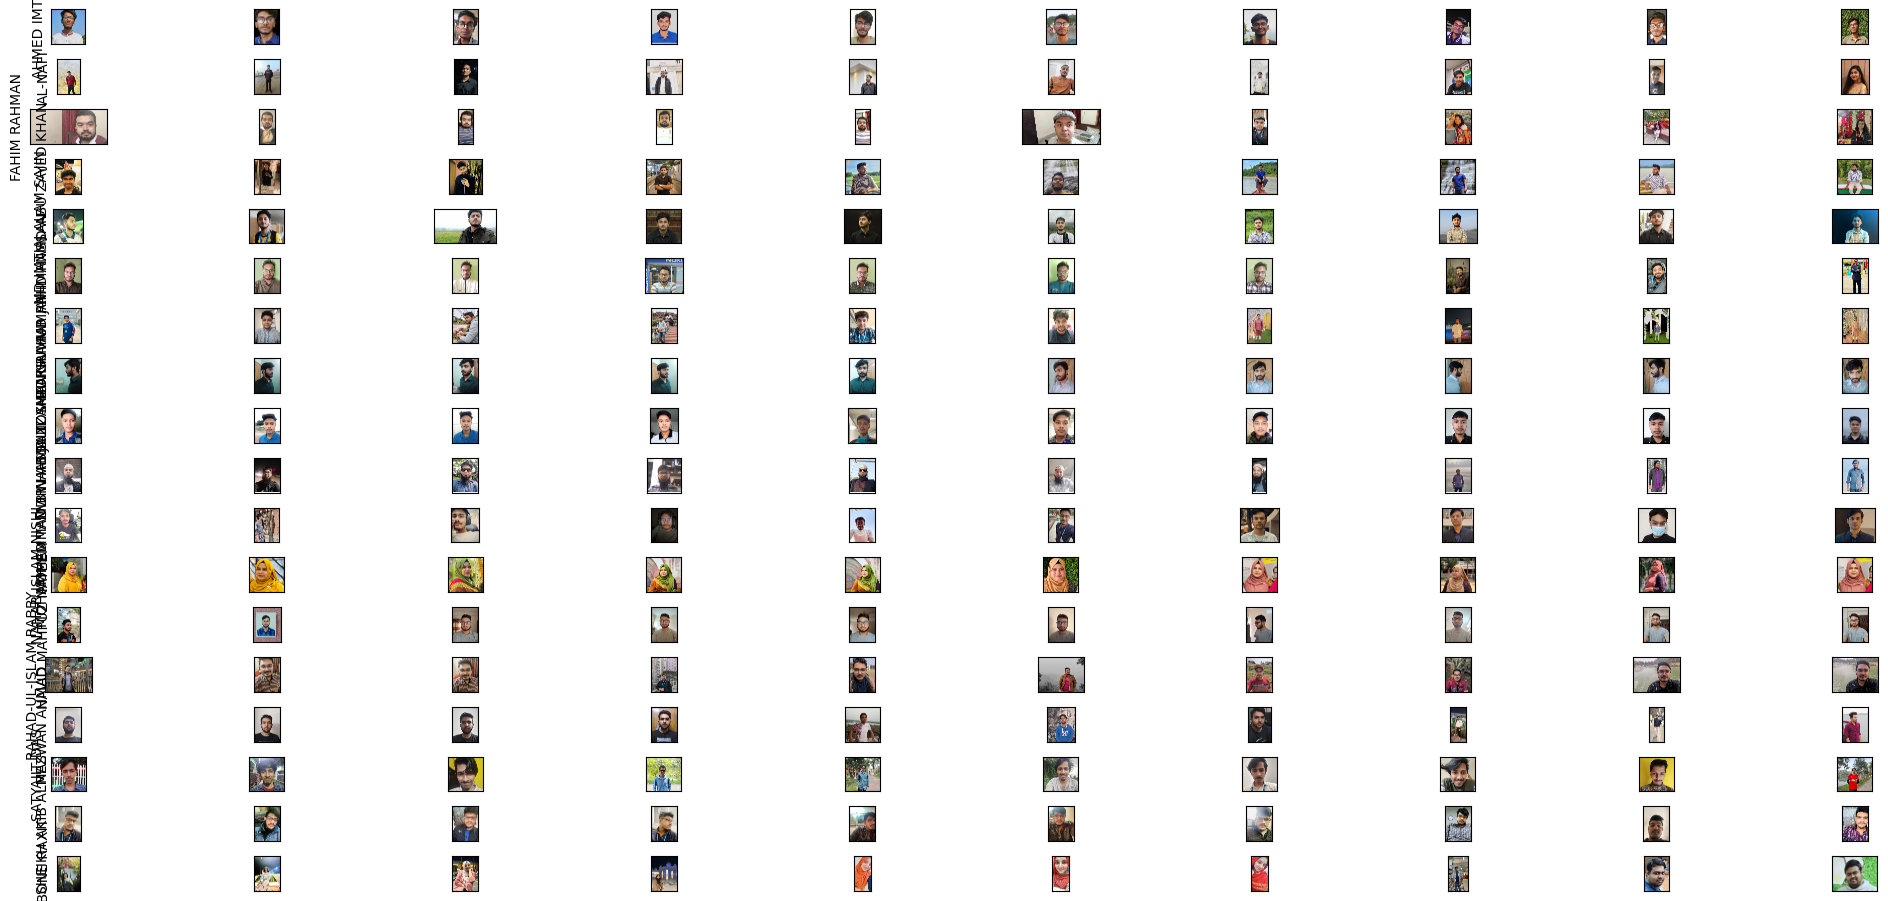

In [6]:
import cv2
import os
import matplotlib.pyplot as plt

fig_width = 10 * 2  
fig_height = 80 * 0.5 
plt.figure(figsize=(fig_width, fig_height))
i = 0
for c in CATEGORIES:  
    path = os.path.join(TRAIN_DATA_DIR, c)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        img_array = cv2.imread(img_path)
        if img_array is None:
            print(f"Warning: Could not read image {img_path}")
            continue
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.subplot(80, 10, i+1)
        plt.imshow(img_array)
        if i % 10 == 0:
            plt.ylabel(c)
        plt.xticks([])
        plt.yticks([])
        i += 1
        if i % 10 == 0:
            break

plt.tight_layout()        
plt.show()


In [7]:
training_data = []

for c in CATEGORIES:
    path = os.path.join(TRAIN_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) # 0
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   # read the image
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize the image
            training_data.append([img_resized, class_num]) # [ [img, 0]
        except Exception as e:
            pass
        
print(len(training_data))

0it [00:00, ?it/s]
100%|██████████| 8/8 [00:00<00:00, 37.37it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 2/2 [00:00<00:00, 199.94it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 22.76it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 32.70it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 18/18 [00:01<00:00, 15.43it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 28.05it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 12.42it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 7000.51it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 12.89it/s]
0it [00:00, ?it/s]
100%|██████████| 7/7 [00:00<00:00, 11.43it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100

309


In [8]:
valid_data = []

for c in CATEGORIES:
    path = os.path.join(VALID_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            valid_data.append([img_resized, class_num])
        except Exception as e:
            pass
        
print(len(valid_data))

0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 499.56it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 71.40it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 27.77it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 199.88it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 26.66it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 20.40it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 45.44it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 199.94it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00, 19.99it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00,  6.94it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [

54


In [9]:
test_data = []

for c in CATEGORIES:
    path = os.path.join(TEST_DATA_DIR, c) 
    class_num = CATEGORIES.index(c) 
    for img in tqdm(os.listdir(path)):
        try:
            img_array = cv2.imread(os.path.join(path, img))   
            img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
            test_data.append([img_resized, class_num])
        except Exception as e:
            pass
        
print(len(test_data))

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 11.25it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<?, ?it/s]

92


In [10]:
random.shuffle(training_data)
random.shuffle(valid_data)
random.shuffle(test_data)

In [11]:
X_train = []
Y_train = []

for img, label in training_data:
    X_train.append(img)
    Y_train.append(label)
    
X_train = np.array(X_train).astype('float32').reshape(-1,300,300,3)
Y_train = np.array(Y_train)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")

X_train= (309, 300, 300, 3) Y_train= (309,)


In [12]:
X_valid = []
Y_valid = []

for img, label in valid_data:
    X_valid.append(img)
    Y_valid.append(label)
    
X_valid = np.array(X_valid).astype('float32').reshape(-1,300,300,3)
Y_valid = np.array(Y_valid)

print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")

X_valid= (54, 300, 300, 3) Y_valid= (54,)


In [13]:
X_test = []
Y_test = []

for features,label in test_data:
    X_test.append(features)
    Y_test.append(label)

X_test = np.array(X_test).astype('float32').reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y_test = np.array(Y_test)

print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_test= (92, 300, 300, 3) Y_test= (92,)


In [14]:
pickle_out = open("X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("Y_train.pickle","wb")
pickle.dump(Y_train, pickle_out)
pickle_out.close()

pickle_out = open("X_valid.pickle","wb")
pickle.dump(X_valid, pickle_out)
pickle_out.close()

pickle_out = open("Y_valid.pickle","wb")
pickle.dump(Y_valid, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle","wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [16]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(309, 300, 300, 3) (309,)
(92, 300, 300, 3) (92,)


In [17]:
class_names = CATEGORIES

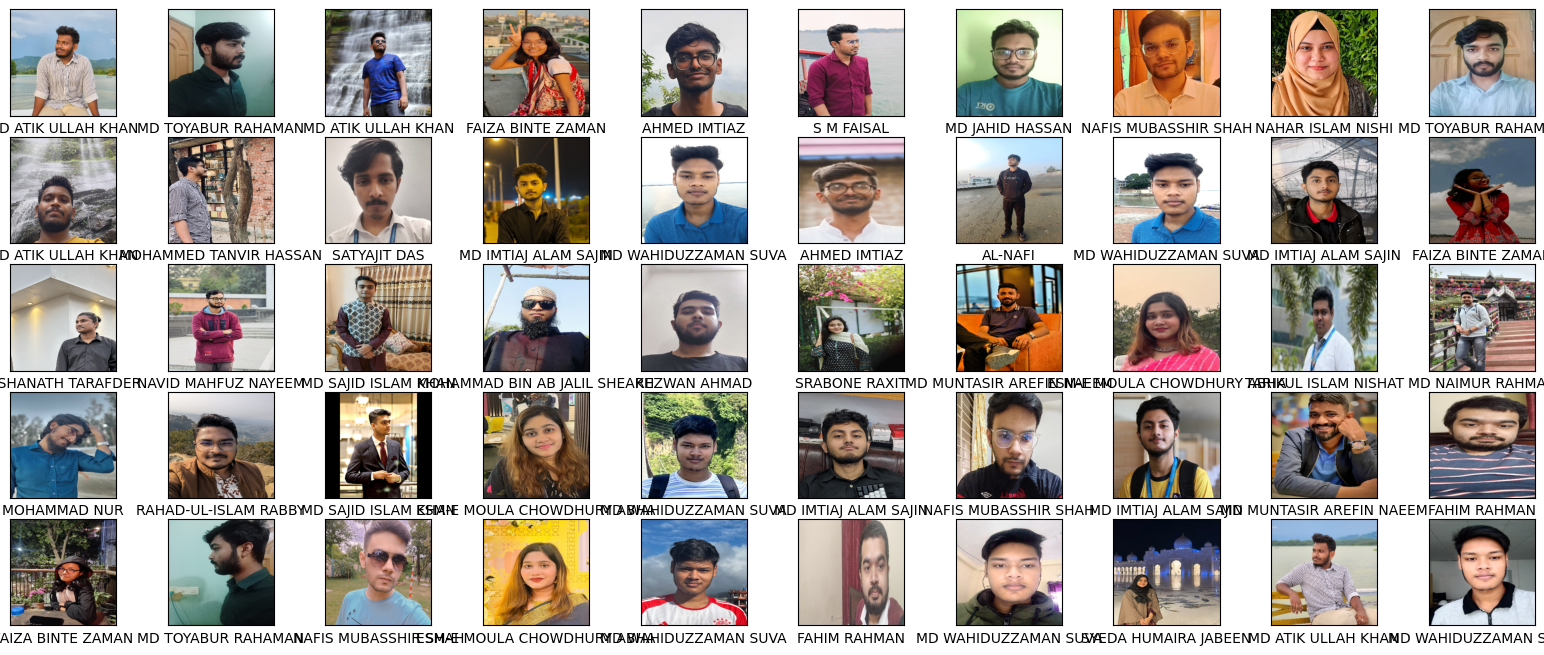

In [18]:
plt.figure(figsize=(20, 8))

for i in range(50):
    plt.subplot(5, 10, i + 1)
    image_rgb = X_train[i][..., ::-1]
    
    plt.imshow(image_rgb.astype('uint8'))  
    plt.xticks([])
    plt.yticks([])

    plt.xlabel(class_names[Y_train[i]])

plt.show()


In [19]:
model = keras.Sequential([
    keras.Input(shape=(300, 300, 3)), 
    
    ## Hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
   
    layers.Dense(77, activation='softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 296, 296, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

In [20]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [21]:
h = model.fit(x=X_train, y=Y_train, epochs=5, validation_split=0.2, batch_size=78)


Epoch 1/5
4/4 [==============================] - 6s 2s/step - loss: 376.0475 - accuracy: 0.0081 - val_loss: 14.8593 - val_accuracy: 0.0161
Epoch 2/5
4/4 [==============================] - 6s 1s/step - loss: 11.7218 - accuracy: 0.0202 - val_loss: 6.0457 - val_accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 6s 1s/step - loss: 4.4050 - accuracy: 0.0891 - val_loss: 4.2867 - val_accuracy: 0.0323
Epoch 4/5
4/4 [==============================] - 6s 1s/step - loss: 3.7466 - accuracy: 0.1700 - val_loss: 4.3513 - val_accuracy: 0.1290
Epoch 5/5
4/4 [==============================] - 6s 1s/step - loss: 2.6219 - accuracy: 0.3725 - val_loss: 4.1264 - val_accuracy: 0.0968


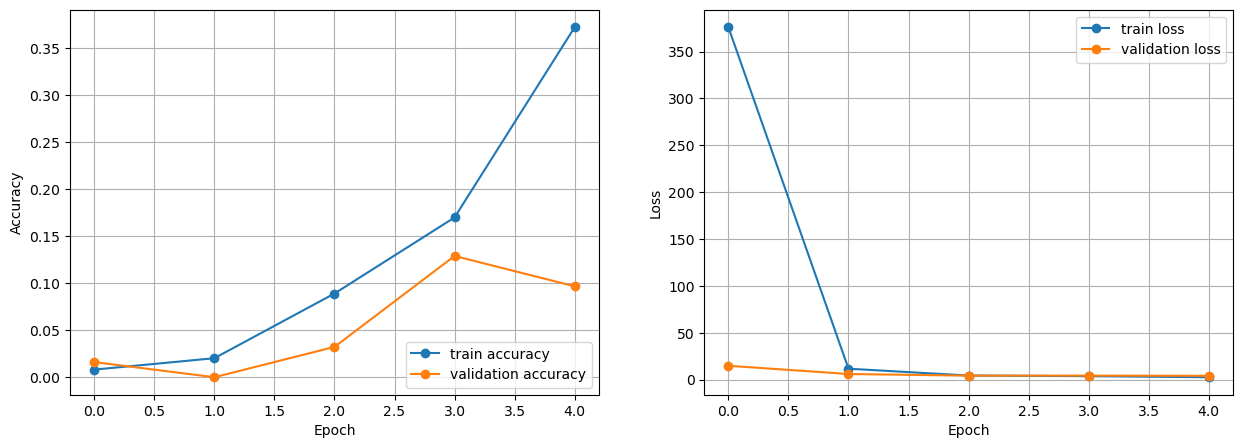

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [23]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

3/3 [==============================] - 0s 134ms/step - loss: 4.0607 - accuracy: 0.1413

Test Accuracy: 0.14130434393882751

Test Loss: 4.060696125030518


In [24]:
predictions = model.predict(X_test)

In [25]:
predictions[0]

array([0.02298411, 0.04413501, 0.01160054, 0.00228134, 0.00770702,
       0.01485185, 0.00704395, 0.0091326 , 0.01278002, 0.0104594 ,
       0.0078688 , 0.0172106 , 0.00346703, 0.0027334 , 0.00182276,
       0.00728309, 0.0024922 , 0.00461914, 0.03600746, 0.0061563 ,
       0.00598241, 0.00331175, 0.01539133, 0.01534603, 0.04352425,
       0.01427858, 0.04148363, 0.02051592, 0.0048215 , 0.00739255,
       0.03756351, 0.02077813, 0.00671519, 0.01037533, 0.00755341,
       0.00317082, 0.00777691, 0.00796734, 0.01654727, 0.01477135,
       0.02202774, 0.01190157, 0.00604054, 0.02355264, 0.00524591,
       0.00845858, 0.00415753, 0.01059921, 0.01482005, 0.01706458,
       0.00389203, 0.0040671 , 0.01153795, 0.00193445, 0.00375016,
       0.00723476, 0.0420818 , 0.01238495, 0.01303931, 0.01451667,
       0.00770355, 0.00450427, 0.00828054, 0.0138079 , 0.04263613,
       0.0072119 , 0.01104474, 0.01130919, 0.00734546, 0.03387346,
       0.00736779, 0.01588423, 0.01023756, 0.00393254, 0.00728

In [26]:
np.argmax(predictions[0])

1

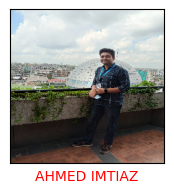

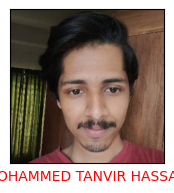

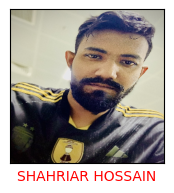

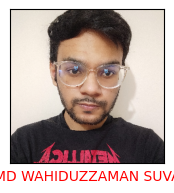

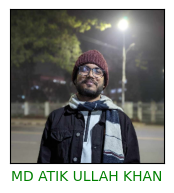

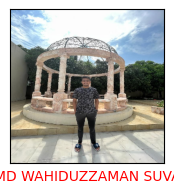

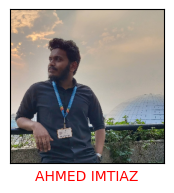

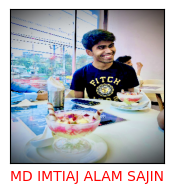

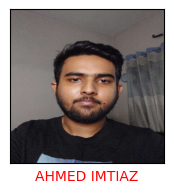

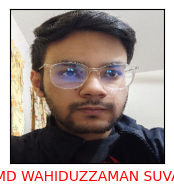

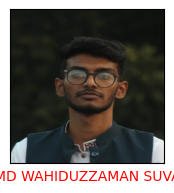

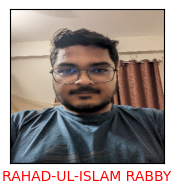

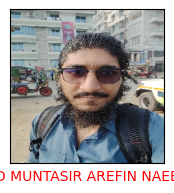

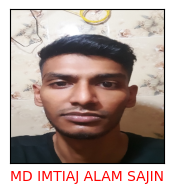

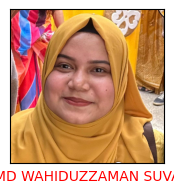

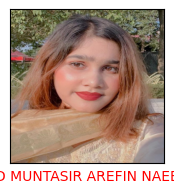

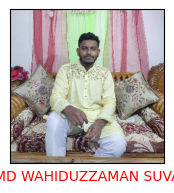

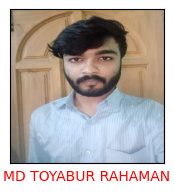

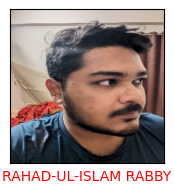

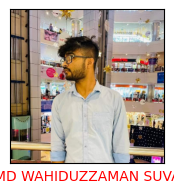

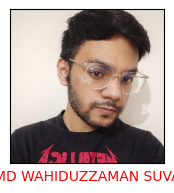

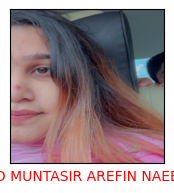

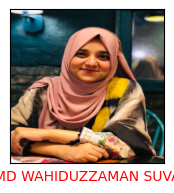

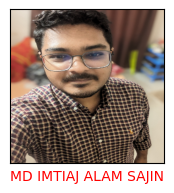

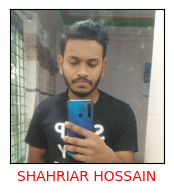

In [29]:
for i in range(min(25, len(X_test))):

    img_rgb = X_test[i][..., ::-1]
    if img_rgb.dtype == 'float32' or img_rgb.dtype == 'float64':
        if img_rgb.max() > 1:
            img_rgb /= 255.0

    plt.figure(figsize=(2, 2)) 
    plt.imshow(img_rgb)
    plt.xticks([])
    plt.yticks([])

    predicted_label = np.argmax(predictions[i])
   
    if predicted_label < len(class_names) and not predicted_label in classes_to_ignore:
        plt.xlabel(class_names[predicted_label], color='green' if true_label == predicted_label else 'red')

    plt.show() 